In [1]:
from typing import TypedDict,Literal
class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    target_currency : Literal ["INR","EUR"]
    total: float


In [6]:
def calc_total_usd(state: PortfolioState) -> PortfolioState:
    state["total_usd"] = state["amount_usd"] * 1.2
    return state

def convert_inr(state: PortfolioState) -> PortfolioState:
    state["total"] = state["amount_usd"] * 88
    return state
def convert_eur(state: PortfolioState) -> PortfolioState:
    state["total"] = state["amount_usd"] * .9
    return state
def choose_currency(state: PortfolioState) -> str:
        return state["target_currency"]





In [11]:
from langgraph.graph import StateGraph,START,END
builder = StateGraph(PortfolioState)

builder.add_node("calc_total_usd_node",calc_total_usd )
builder.add_node("convert_to_inr_node" ,convert_inr )
builder.add_node("convert_to_eur_node" ,convert_eur )

builder.add_edge(START,"calc_total_usd_node")
builder.add_conditional_edges(
    "calc_total_usd_node",
    choose_currency,
    {
        "INR": "convert_to_inr_node",
        "EUR": "convert_to_eur_node",
     }
)
builder.add_edge(["convert_to_inr_node","convert_to_eur_node"], END)

app=builder.compile()

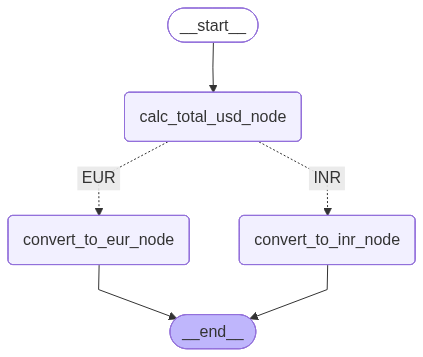

In [15]:
import graphviz
from IPython.display import Image

# graph = graphviz.Source(app)
display(app)


In [19]:
app.invoke({'amount_usd':2500,'target_currency':'EUR'})

{'amount_usd': 2500,
 'total_usd': 3000.0,
 'target_currency': 'EUR',
 'total': 2250.0}